### Importing Libraries and Data

This script contains the following:
Visualizations
Correlations
Scatterplots
Pair Plots
Catigorical Plots

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing cleaned data
path = r'/Users/jennyfevik/Desktop/Data'

In [3]:
df_border = pd.read_csv(os.path.join(path, 'Prepared', 'Border_Crossing_Entry_Data_Cleaned.csv'),index_col=0)

In [4]:
df_border.head()

,Port Name,State,Border,Crossing Method,Count of Crossing,Latitude,Longitude,Month,Year
0,Del Rio,Texas,US-Mexico Border,Trucks,5823,29.327,-100.928,Feb,2023
1,Roma,Texas,US-Mexico Border,Trains,0,26.404,-99.019,Aug,2009
2,Skagway,Alaska,US-Canada Border,Pedestrians,1,59.630,-135.164,Feb,2023
3,Brownsville,Texas,US-Mexico Border,Trains,70,25.952,-97.401,Feb,2023
4,Sault Sainte Marie,Michigan,US-Canada Border,Truck Containers Loaded,2322,46.509,-84.361,Feb,2023


### Correlations

In [5]:
# Creating subset for numeric values only
df_sub = df_border[['Count of Crossing', 'Year']]

In [6]:
df_sub.corr()

,Count of Crossing,Year
Count of Crossing,1.000000,-0.008866
Year,-0.008866,1.000000


Most of the variables are categorical and not numeric, so not returning substantial correlation.

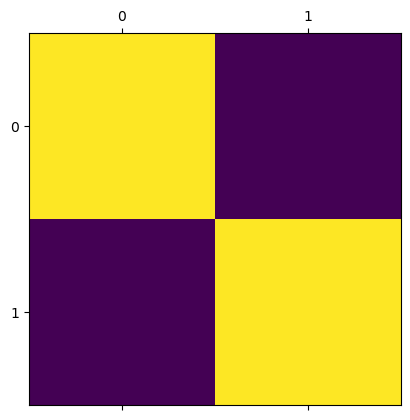

In [7]:
# correlation heatmap with matplotlib
plt.matshow(df_sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

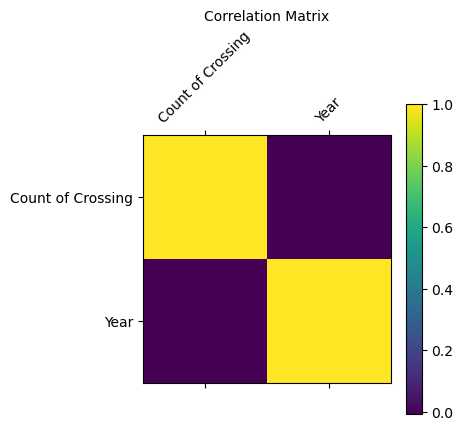

In [8]:
# adding labels and legend
f=plt.figure(figsize=(4,4))
plt.matshow(df_sub.corr(), fignum=f.number)
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=10, rotation=45)
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)


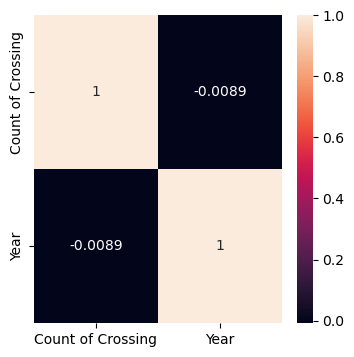

In [9]:
# correlation heatmap with seaborn
f,ax = plt.subplots(figsize=(4,4))
corr=sns.heatmap(df_sub.corr(), annot = True, ax=ax)

There is zero correlation between the year and the number of people crossing the border.

### Scatterplots

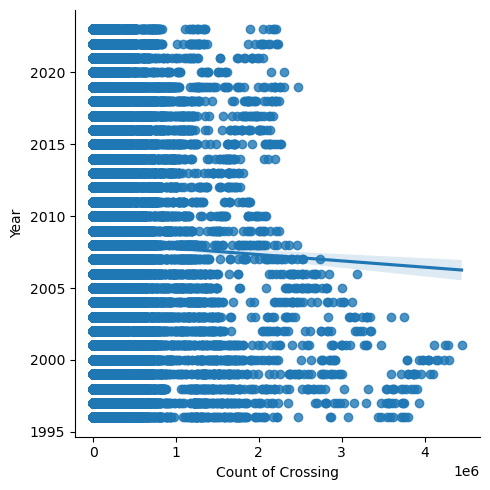

In [10]:
# creating a scatterplot with 2 variables
sns.lmplot(x = 'Count of Crossing', y= 'Year', data= df_border)

There is no visible correlation.

### Pair Plot

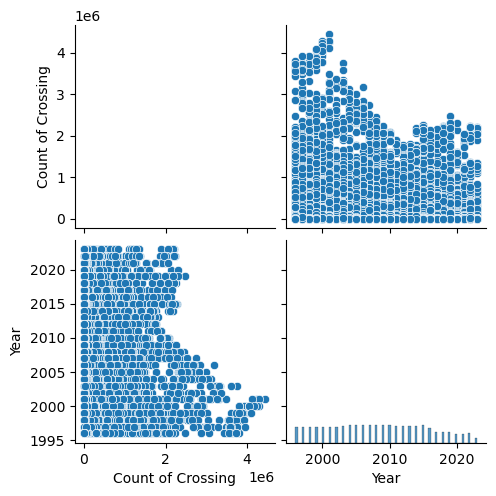

In [11]:
g = sns.pairplot(df_sub)

### Catigorical Plot

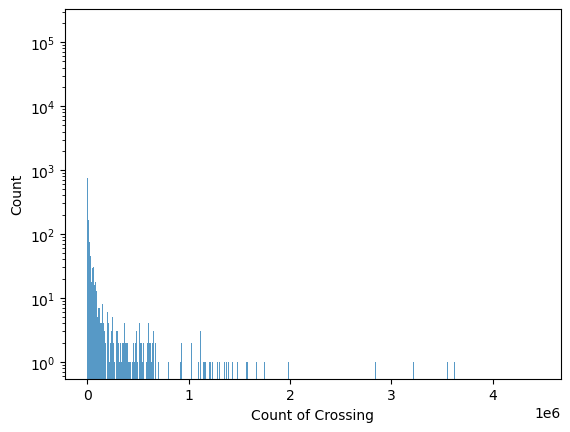

In [12]:
# Histogram to visualize the distribution of crossings
sns.histplot(df_border['Count of Crossing'])
plt.yscale('log')

There appear to be some outliers above the 2,000,000 million mark, but could be due to busier ports.

In [13]:
# check for extreme values
df_border[df_border['Count of Crossing']>3000000]

,Port Name,State,Border,Crossing Method,Count of Crossing,Latitude,Longitude,Month,Year
227270,San Ysidro,California,US-Mexico Border,Personal Vehicle Passengers,3000768,32.543,-117.029,Dec,2005
231129,San Ysidro,California,US-Mexico Border,Personal Vehicle Passengers,3181791,32.543,-117.029,Nov,2006
245435,San Ysidro,California,US-Mexico Border,Personal Vehicle Passengers,3755585,32.543,-117.029,Dec,2003
249576,San Ysidro,California,US-Mexico Border,Personal Vehicle Passengers,3012706,32.543,-117.029,Aug,2004
251262,San Ysidro,California,US-Mexico Border,Personal Vehicle Passengers,3593252,32.543,-117.029,Nov,2003
...,...,...,...,...,...,...,...,...,...
376284,El Paso,Texas,US-Mexico Border,Personal Vehicle Passengers,3432457,31.764,-106.451,Sep,1996
376394,El Paso,Texas,US-Mexico Border,Personal Vehicle Passengers,3575686,31.764,-106.451,Apr,1997
376770,El Paso,Texas,US-Mexico Border,Personal Vehicle Passengers,3584887,31.764,-106.451,Aug,1996
383313,El Paso,Texas,US-Mexico Border,Personal Vehicle Passengers,3551457,31.764,-106.451,Jun,1996


In [14]:
df_border[df_border['Count of Crossing']<1]

,Port Name,State,Border,Crossing Method,Count of Crossing,Latitude,Longitude,Month,Year
1,Roma,Texas,US-Mexico Border,Trains,0,26.404,-99.019,Aug,2009
3838,Detroit,Michigan,US-Canada Border,Pedestrians,0,42.332,-83.048,Dec,2017
3881,Turner,Montana,US-Canada Border,Bus Passengers,0,49.000,-108.388,Sep,2015
3883,Ambrose,North Dakota,US-Canada Border,Buses,0,48.999,-103.487,Mar,2016
3885,Antler,North Dakota,US-Canada Border,Pedestrians,0,48.999,-101.296,Feb,2015
...,...,...,...,...,...,...,...,...,...
384229,Andrade,California,US-Mexico Border,Trains,0,32.718,-114.728,Dec,1996
384232,Limestone,Maine,US-Canada Border,Train Passengers,0,46.925,-67.790,Aug,1996
384233,Rio Grande City,Texas,US-Mexico Border,Rail Containers Loaded,0,26.366,-98.803,May,1996
384234,Van Buren,Maine,US-Canada Border,Rail Containers Loaded,0,47.160,-67.931,Dec,1996


In [15]:
# eliminating ports with 0 crossings
df_border = df_border[df_border['Count of Crossing']>=1]

In [16]:
# Creating categories
df_border.loc[df_border['Count of Crossing']<500000, 'Count Category'] = 'Low Crossings'

In [17]:
df_border.loc[(df_border['Count of Crossing']>=500000)&(df_border['Count of Crossing']<1500000), 'Count Category'] = 'Medium Crossings'

In [18]:
df_border.loc[df_border['Count of Crossing']>=1500000, 'Count Category'] = 'High Crossings'

In [19]:
df_border['Count Category'].value_counts(dropna=False)

Low Crossings       255795
Medium Crossings      5175
High Crossings         858
Name: Count Category, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, '1996'),
  Text(1, 0, '1997'),
  Text(2, 0, '1998'),
  Text(3, 0, '1999'),
  Text(4, 0, '2000'),
  Text(5, 0, '2001'),
  Text(6, 0, '2002'),
  Text(7, 0, '2003'),
  Text(8, 0, '2004'),
  Text(9, 0, '2005'),
  Text(10, 0, '2006'),
  Text(11, 0, '2007'),
  Text(12, 0, '2008'),
  Text(13, 0, '2009'),
  Text(14, 0, '2010'),
  Text(15, 0, '2011'),
  Text(16, 0, '2012'),
  Text(17, 0, '2013'),
  Text(18, 0, '2014'),
  Text(19, 0, '2015'),
  Text(20, 0, '2016'),
  Text(21, 0, '2017'),
  Text(22, 0, '2018'),
  Text(23, 0, '2019'),
  Text(24, 0, '2020'),
  Text(25, 0, '2021'),
  Text(26, 0, '2022'),
  Text(27, 0, '2023')])

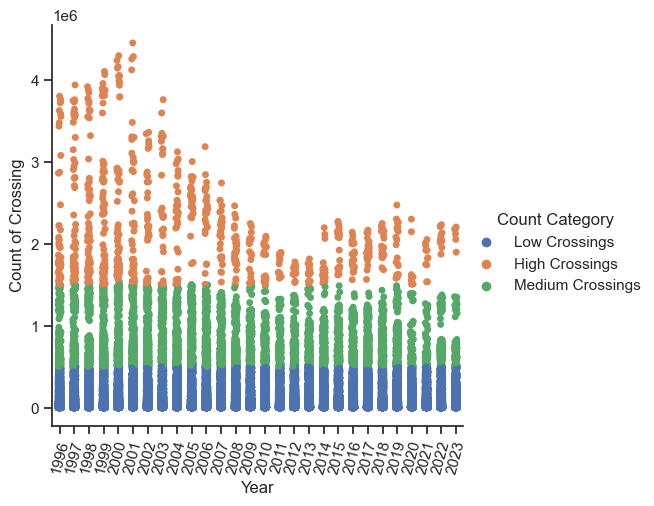

In [20]:
# Creating plot in seaborn using categories created
sns.set(style='ticks')
g=sns.catplot(x='Year', y='Count of Crossing', hue='Count Category', data=df_border)
plt.xticks(rotation=75)

Every year had High Crossing counts, but some significantly more.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Texas'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'Michigan'),
  Text(3, 0, 'Arizona'),
  Text(4, 0, 'California'),
  Text(5, 0, 'North Dakota'),
  Text(6, 0, 'Washington'),
  Text(7, 0, 'Minnesota'),
  Text(8, 0, 'Idaho'),
  Text(9, 0, 'Vermont'),
  Text(10, 0, 'Maine'),
  Text(11, 0, 'Montana'),
  Text(12, 0, 'New York'),
  Text(13, 0, 'New Mexico')])

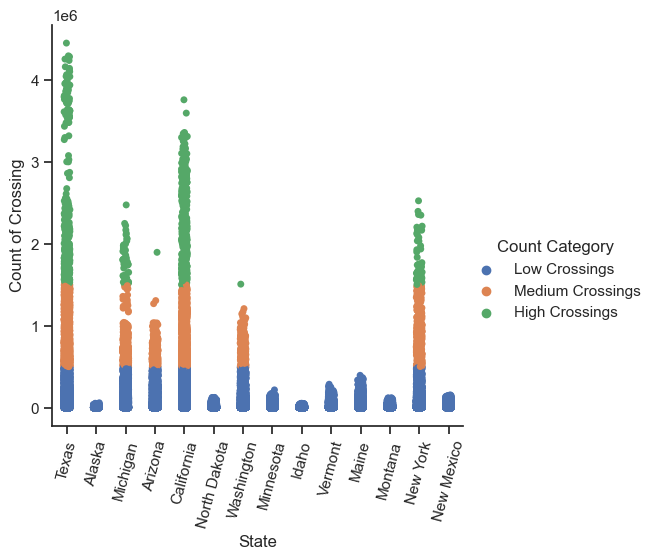

In [21]:
# Checking count of crossing by state
sns.set(style='ticks')
g=sns.catplot(x='State', y='Count of Crossing', hue='Count Category', data=df_border)
plt.xticks(rotation=75)

Looking by state it becomes clear that select states have a much higher percent of border crossings. Texas, California and New York being the leaders.

In [22]:
# exploring relationships between categorical variables.
pd.crosstab(df_border['Crossing Method'], df_border['Border'])

Border,US-Canada Border,US-Mexico Border
Crossing Method,,
Bus Passengers,15608,6021
Buses,15709,6044
Pedestrians,12012,8349
Personal Vehicle Passengers,26673,8248
Personal Vehicles,26820,8250
Rail Containers Empty,6886,2410
Rail Containers Loaded,6960,2100
Train Passengers,7833,1476
Trains,8069,2511


In [23]:
pd.crosstab(df_border['Crossing Method'], df_border['State'])

State,Alaska,Arizona,California,Idaho,Maine,Michigan,Minnesota,Montana,New Mexico,New York,North Dakota,Texas,Vermont,Washington
Crossing Method,,,,,,,,,,,,,,
Bus Passengers,763,1417,1399,564,2160,950,1609,1459,551,1717,2361,2654,1121,2904
Buses,773,1421,1416,565,2178,951,1614,1466,557,1721,2386,2650,1128,2927
Pedestrians,675,1975,2013,576,2622,50,1020,1184,640,1262,637,3721,997,2989
Personal Vehicle Passengers,1150,1977,1948,658,3623,1009,2338,3848,655,2055,5938,3668,1632,4422
Personal Vehicles,1179,1979,1948,660,3640,1038,2338,3870,655,2059,5937,3668,1643,4456
Rail Containers Empty,0,331,727,330,1234,944,411,327,0,880,630,1352,899,1231
Rail Containers Loaded,0,331,413,330,1244,944,411,327,0,881,649,1356,901,1273
Train Passengers,134,267,797,324,1170,965,916,315,0,976,657,412,976,1400
Trains,129,330,807,330,1284,988,956,330,0,981,666,1374,985,1420


Previous Questions:
Which border has the most crossings?  Answer - Unclear at this time

Which border state has the most crossings? Answer - Possibly Texas or California.  Which has the fewest?  Answer - Alaska and Idaho

What method of crossing is most used? Answer - Unanswered

Have crossings increased or decreased over time?  Answer - Both, there was a dip in crossings, over time, and then a gradual rise again.

It would be interesting to explore specific ports in the states with the higher crossing counts. Do the states with lower crossing counts contain less ports?  Also to check years and months to see if there is a seasonal pattern, like are there more crossings from Canda in summer and more crossings from Mexico in winter? 

My hypothesis is that season has an effect on crossings from Canada, and that most Canadian crossings are in summer months.  I also hypothesize that season does not affect crossings from the Mexican border, and they hold steady all year.

In [24]:
df_border.to_csv(os.path.join(path, 'Prepared', 'Border_Exploration.csv'))